In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
dat = np.load("datasets/dataset_cont_speccls_1_1_3_0.npz")["class_sig_list"]
print(dat.shape)
print(dat[0].shape)

cont_dat = []
for i in range(dat.shape[0]):
    cont_dat.append(dat[i, :, 0].T)
    
print(len(cont_dat))

(3, 1, 1, 1000)
(1, 1, 1000)
3


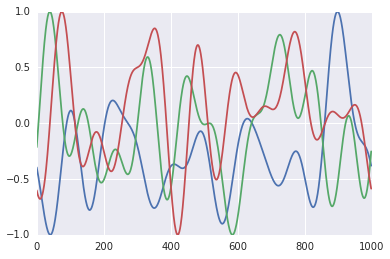

In [37]:
for d in cont_dat:
    plt.plot(d)

In [39]:
dat = np.load("datasets/dataset_disc_speccls_1_1_3_0.npz")["class_sig_list"]

disc_dat = []
for i in range(dat.shape[0]):
    disc_dat.append(dat[i, :, 0].T)

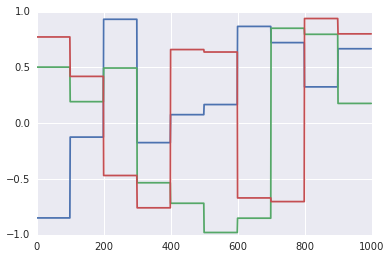

In [40]:
for d in disc_dat:
    plt.plot(d)

In [42]:
dat = np.load("datasets/dataset_orth_speccls_1_1_3_0.npz")["class_sig_list"]
print(dat.shape)
print(dat[0].shape)

orth_dat = []
for i in range(dat.shape[0]):
    orth_dat.append(dat[i, :, 0].T)

(3, 1, 1, 1000)
(1, 1, 1000)


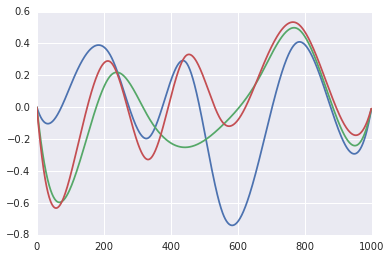

In [43]:
for d in orth_dat:
    plt.plot(d)

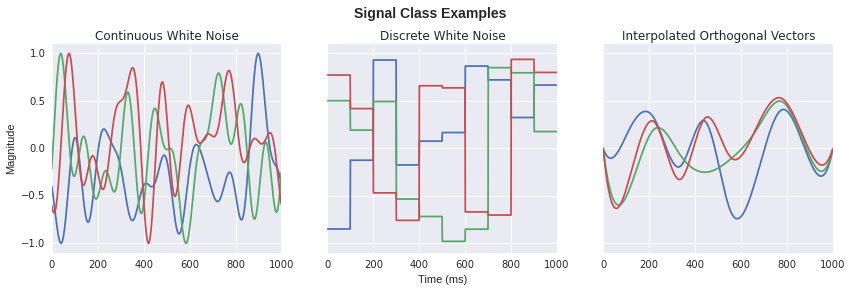

In [44]:
dat_list = [cont_dat, disc_dat, orth_dat]
title_list = ("Continuous White Noise", "Discrete White Noise", "Interpolated Orthogonal Vectors")

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14,4))

for di, dat in enumerate(dat_list):
    for d_vals in dat:
        axes[di].plot(d_vals)

    axes[di].set_title(title_list[di])
    axes[di].set_ylim((-1.1, 1.1))

fig.suptitle("Signal Class Examples", fontsize=14, fontweight="bold")
fig.subplots_adjust(top=0.85)
axes[0].set_ylabel("Magnitude")
axes[1].set_xlabel("Time (ms)")
plt.savefig("sigs.pdf", format="pdf")

In [80]:
sig = dat[0][0, :].T
noise = np.random.normal(0, 1, size=sig.shape[0])
add = sig+noise
print(add.shape)
conv = np.convolve(sig, noise, mode="same")
print(conv.shape)

(1000,)
(1000,)


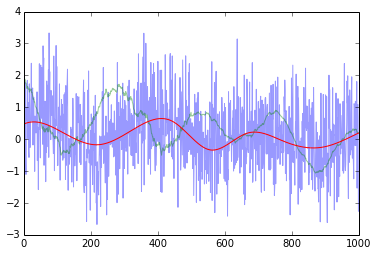

In [81]:
plt.plot(add, alpha=0.4)
plt.plot(conv/10, alpha=0.4)
plt.plot(sig)

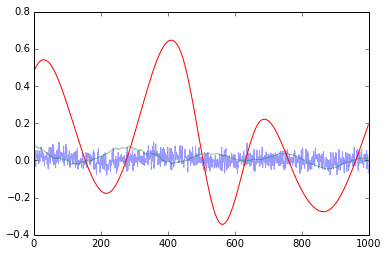

In [82]:
from numpy.linalg import norm

plt.plot(add/norm(add), alpha=0.4)
plt.plot(conv/norm(conv), alpha=0.4)
plt.plot(sig)

In [83]:
def d3_scale(dat, out_range=(-1, 1), in_range=None):
    if in_range == None:
        domain = [np.min(dat, axis=0), np.max(dat, axis=0)]
    else:
        domain = in_range

    def interp(x):
        return out_range[0] * (1.0 - x) + out_range[1] * x

    def uninterp(x):
        b = 0
        if (domain[1] - domain[0]) != 0:
            b = domain[1] - domain[0]
        else:
            b =  1.0 / domain[1]
        return (x - domain[0]) / b

    return interp(uninterp(dat))

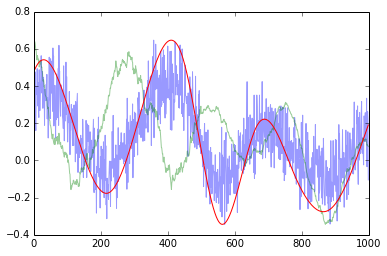

In [84]:
out_range = (np.min(sig), np.max(sig))
plt.plot(d3_scale(sig+noise/5.0, out_range=out_range), alpha=0.4)
plt.plot(d3_scale(conv, out_range=out_range), alpha=0.4)
plt.plot(sig)

In [3]:
new_dat = np.load("datasets/dataset_disc_speccls_1_2_3_0_aug_add_rand_noise.npz")["class_sig_list"]
dat = np.load("datasets/dataset_disc_speccls_1_2_3_0.npz")["class_sig_list"]

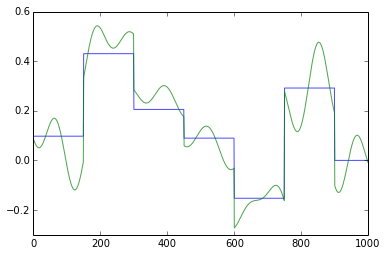

In [4]:
plt.plot(dat[0][0].T, alpha=0.7)
plt.plot(new_dat[0][0][0].T, alpha=0.7)

In [121]:
print(dat.shape)
print(new_dat.shape)

(3, 2, 1000)
(3, 1, 2, 1000)


In [10]:
new_dat = np.load("datasets/dataset_flatcls_1_2_3_0_aug_add_rand_noise.npz")["class_sig_list"]
dat = np.load("datasets/dataset_flatcls_1_2_3_0.npz")["class_sig_list"]

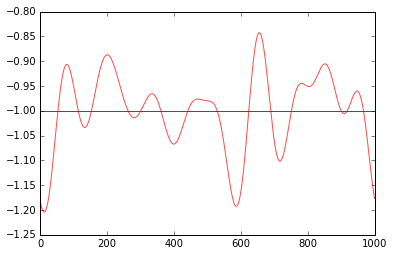

In [11]:
plt.plot(dat[0][0].T, alpha=0.7)
plt.plot(new_dat[0][0][0].T, alpha=0.7)

In [12]:
print(dat.shape)
print(new_dat.shape)

(3, 1, 2, 1000)
(3, 1, 2, 1000)
